In [1]:
from style_bench.utils import extract_texts

In [57]:
from textdistance import levenshtein, damerau_levenshtein

s1 = [1,2,3,4,5]
s2 = [1,3,2,4,5,6]

print(levenshtein(s1, s2))
print(damerau_levenshtein(s1, s2))

3
2


In [14]:
import pickle
from style_bench.lexical import LexicalComputer

metrics = pickle.load(open("output/obama/lexical_metrics.pkl", "rb"))

In [15]:
dir(metrics)
[attr for attr in dir(metrics) if not attr.startswith('__')]


['function_word_frequency', 'legomena', 'richness', 'sentiment', 'word_length']

In [16]:
metrics.richness.mattr

[0.7000000000000001,
 0.585,
 0.62625,
 0.6466666666666666,
 0.646,
 0.5800000000000001,
 0.665,
 0.685,
 0.5475,
 0.6322222222222222,
 0.605,
 0.6716666666666667,
 0.6183333333333333,
 0.6399999999999999,
 0.64375,
 0.65,
 0.655,
 0.6623076923076923,
 0.53,
 0.6283333333333334,
 0.5725,
 0.5866666666666667,
 0.6379999999999999,
 0.6599999999999999,
 0.6375,
 0.6883116883116883,
 0.6425000000000001,
 0.58,
 0.6575000000000001,
 0.6500000000000001,
 0.5633333333333334,
 0.61,
 0.5666666666666668,
 0.6088888888888888,
 0.6325,
 0.6663636363636364,
 0.6584615384615383,
 0.6637500000000001,
 0.6275,
 0.6525,
 0.64,
 0.6633333333333333,
 0.7000000000000001,
 0.6649999999999999,
 0.6749999999999999,
 0.6,
 0.6900000000000001,
 0.678,
 0.44999999999999996,
 0.635,
 0.6680000000000001,
 0.5850000000000001,
 0.624,
 0.6528571428571429,
 0.66125,
 0.6581818181818181,
 0.6683333333333333,
 0.4733333333333334,
 0.6672727272727272,
 0.6211111111111112,
 0.662,
 0.5474999999999999,
 0.58400000000000

In [6]:
metrics.function_word_frequency

[0.5423280423280423,
 0.5502958579881657,
 0.5234270414993306,
 0.5225225225225225,
 0.5334728033472803,
 0.5105882352941177,
 0.4972677595628415,
 0.5173299101412067,
 0.525974025974026,
 0.5135467980295566,
 0.562874251497006,
 0.5387205387205387,
 0.5578583765112263,
 0.5324532453245324,
 0.5149359886201992,
 0.5506807866868382,
 0.563973063973064,
 0.5271132376395534,
 0.532051282051282,
 0.5400372439478585,
 0.5031446540880503,
 0.5074626865671642,
 0.5081585081585082,
 0.5406006674082313,
 0.5523560209424084,
 0.5584415584415584,
 0.5259067357512953,
 0.5390243902439025,
 0.5165394402035624,
 0.5232067510548524,
 0.5408560311284046,
 0.4939759036144578,
 0.525691699604743,
 0.5526627218934911,
 0.5400516795865633,
 0.549662487945998,
 0.5347758887171561,
 0.5214646464646465,
 0.5646067415730337,
 0.5238095238095238,
 0.5226860254083484,
 0.5308219178082192,
 0.5498281786941581,
 0.5247706422018349,
 0.516295025728988,
 0.5282651072124757,
 0.5133470225872689,
 0.5273279352226721,

In [2]:
# extract texts using the function
bush = extract_texts("data/B2_approved_pairs.json", "answer")
obama = extract_texts("data/O2_approved_pairs.json", "answer")

# sample without replacement 793 texts from bush
import random

bush = random.sample(bush, 793)

In [3]:
from style_bench.lexical import LexicalComputer

lexical_computer = LexicalComputer()

# compute lexical features for both sets
bush_features = lexical_computer.analyze_corpus(bush)
obama_features = lexical_computer.analyze_corpus(obama)

[nltk_data] Downloading package punkt to /home/ryan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/ryan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /home/ryan/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/ryan/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
🔍 Analyzing texts: 100%|██████████████████████████████████████| 793/793 [00:01<00:00, 521.76text/s]


In [13]:
bush_features.word_length.avg

[np.float64(4.487745098039215),
 np.float64(4.116438356164384),
 np.float64(4.687074829931973),
 np.float64(4.779874213836478),
 np.float64(4.3489010989010985),
 np.float64(4.41726618705036),
 np.float64(4.304),
 np.float64(3.876543209876543),
 np.float64(4.462025316455696),
 np.float64(4.491428571428571),
 np.float64(4.484076433121019),
 np.float64(4.4907407407407405),
 np.float64(4.346456692913386),
 np.float64(4.112554112554113),
 np.float64(4.425925925925926),
 np.float64(4.163568773234201),
 np.float64(4.475),
 np.float64(4.0042194092827),
 np.float64(4.3428571428571425),
 np.float64(4.666666666666667),
 np.float64(3.748743718592965),
 np.float64(3.8702702702702703),
 np.float64(4.167420814479638),
 np.float64(4.258503401360544),
 np.float64(4.104477611940299),
 np.float64(4.298245614035087),
 np.float64(4.56140350877193),
 np.float64(4.259911894273127),
 np.float64(4.412280701754386),
 np.float64(4.1546666666666665),
 np.float64(4.382749326145553),
 np.float64(4.230769230769231),

In [7]:
bush_features.legomena.hapax

[0.3161764705882353,
 0.3493150684931507,
 0.41156462585034015,
 0.3836477987421384,
 0.2692307692307692,
 0.3129496402877698,
 0.33066666666666666,
 0.49382716049382713,
 0.41139240506329117,
 0.30857142857142855,
 0.40764331210191085,
 0.23148148148148148,
 0.41732283464566927,
 0.33766233766233766,
 0.4074074074074074,
 0.2862453531598513,
 0.27884615384615385,
 0.35864978902953587,
 0.3678571428571429,
 0.3755868544600939,
 0.2663316582914573,
 0.3675675675675676,
 0.34841628959276016,
 0.4965986394557823,
 0.3582089552238806,
 0.32894736842105265,
 0.45614035087719296,
 0.43171806167400884,
 0.45614035087719296,
 0.27466666666666667,
 0.31536388140161725,
 0.3156498673740053,
 0.452991452991453,
 0.5092592592592593,
 0.31446540880503143,
 0.3004694835680751,
 0.4563758389261745,
 0.34515366430260047,
 0.28532608695652173,
 0.2937853107344633,
 0.4380165289256198,
 0.36909871244635195,
 0.3240223463687151,
 0.5102040816326531,
 0.2733485193621868,
 0.32160804020100503,
 0.283653846

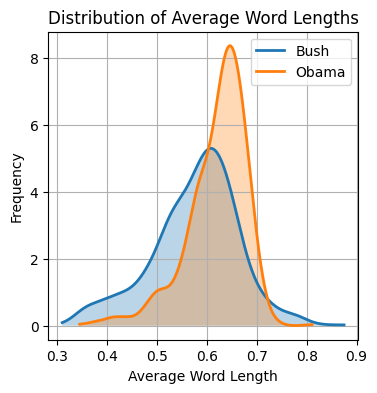

In [12]:
import numpy as np
# Display the distributions
from scipy.stats import gaussian_kde

import matplotlib.pyplot as plt

bush_data = bush_features.richness.mattr
obama_data = obama_features.richness.mattr

bush_kde = gaussian_kde(bush_data)
obama_kde = gaussian_kde(obama_data)

bush_x_range = np.linspace(min(bush_data), max(bush_data), 1000)
obama_x_range = np.linspace(min(obama_data), max(obama_data), 1000)

bush_density = bush_kde(bush_x_range)
obama_density = obama_kde(obama_x_range)

plt.figure(figsize=(4, 4))
plt.plot(bush_x_range, bush_density, linewidth=2, label="Bush")
plt.fill_between(bush_x_range, bush_density, alpha=0.3)

plt.plot(obama_x_range, obama_density, linewidth=2, label="Obama")
plt.fill_between(obama_x_range, obama_density, alpha=0.3)



plt.xlabel("Average Word Length")
plt.ylabel("Frequency")
plt.title("Distribution of Average Word Lengths")
plt.legend()
plt.grid()
plt.show()

In [9]:
from src.style_bench.style import StyleMetrics
metrics = StyleMetrics()

[nltk_data] Downloading package punkt to /home/ryan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/ryan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /home/ryan/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/ryan/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [10]:
bush_metrics = metrics.get_distributions(bush)
obam_metrics = metrics.get_distributions(obama)

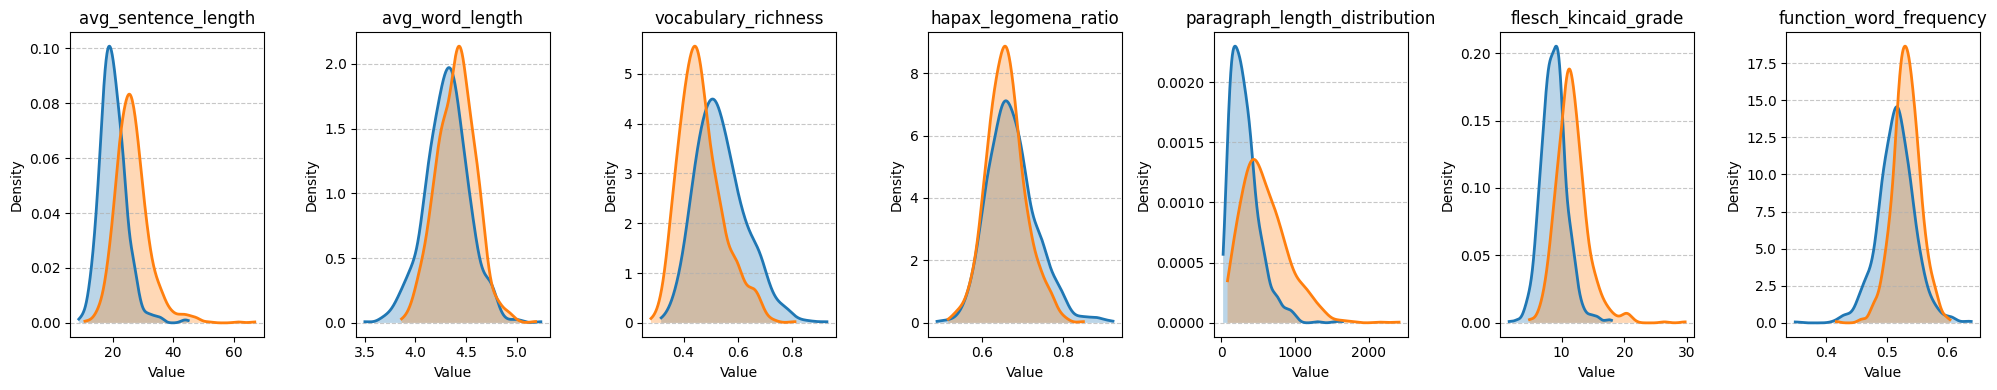

In [11]:
# Display the distributions
from scipy.stats import gaussian_kde

import matplotlib.pyplot as plt
import numpy as np

# a single line of subplots
fig, axs = plt.subplots(1, 7, figsize=(20, 4))
for i, name in enumerate(bush_metrics.metric_names):
    bush_data = getattr(bush_metrics, name)

    # Create KDE
    answer_kde = gaussian_kde(bush_data)
    x_range = np.linspace(min(bush_data), max(bush_data), 1000)
    answer_density = answer_kde(x_range)

    axs[i].plot(x_range, answer_density, linewidth=2)
    axs[i].fill_between(x_range, answer_density, alpha=0.3)

    obama_data = getattr(obam_metrics, name)
    sample_kde = gaussian_kde(obama_data)
    x_range = np.linspace(min(obama_data), max(obama_data), 1000)
    sample_density = sample_kde(x_range)

    axs[i].plot(x_range, sample_density, linewidth=2)
    axs[i].fill_between(x_range, sample_density, alpha=0.3)

    axs[i].set_title(name)
    axs[i].set_xlabel('Value')
    axs[i].set_ylabel('Density')
    axs[i].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [12]:
from scipy.stats import kstest

from scipy.stats import ks_2samp

ks_statistic, p_value = ks_2samp(bush_data, obama_data)


# --- 3. Print and Interpret the Results ---
print("--- Two-Sample KS Test Results ---")
print(f"KS Statistic: {ks_statistic:.4f}")
print(f"P-value: {p_value:.4f}")

print("\n--- Interpretation ---")
if p_value > 0.05:
    print(f"✅ The p-value ({p_value:.4f}) is greater than 0.05.")
    print("This suggests there is no significant statistical difference between the full dataset and the sample.")
    print("You can proceed with the assumption that the sample is representative.")
else:
    print(f"⚠️ The p-value ({p_value:.4f}) is less than or equal to 0.05.")
    print("This suggests there is a statistically significant difference.")
    print("The sample may not be a good representation of your full dataset.")

--- Two-Sample KS Test Results ---
KS Statistic: 0.3090
P-value: 0.0000

--- Interpretation ---
⚠️ The p-value (0.0000) is less than or equal to 0.05.
This suggests there is a statistically significant difference.
The sample may not be a good representation of your full dataset.


In [35]:
ks_stat, p_value

(np.float64(0.025274195498221852), np.float64(0.4278641560963403))

In [33]:
from scipy.stats import wasserstein_distance

wasserstein_distance(answer_density, sample_density)

np.float64(2.8031009842677674)

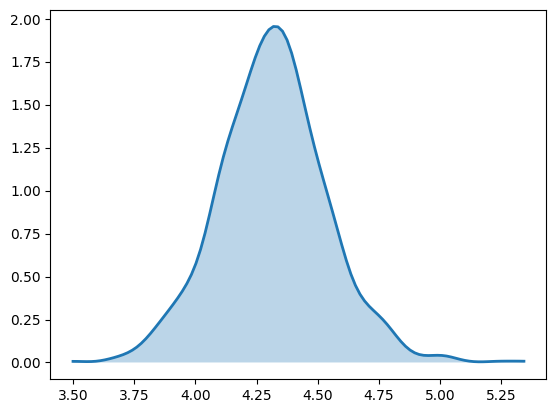

In [18]:
from scipy.stats import gaussian_kde
import numpy as np

# Create KDE
kde = gaussian_kde(answer_metrics.avg_word_length)
x_range = np.linspace(min(answer_metrics.avg_word_length), max(answer_metrics.avg_word_length), 100)
density = kde(x_range)

plt.plot(x_range, density, linewidth=2)
plt.fill_between(x_range, density, alpha=0.3)

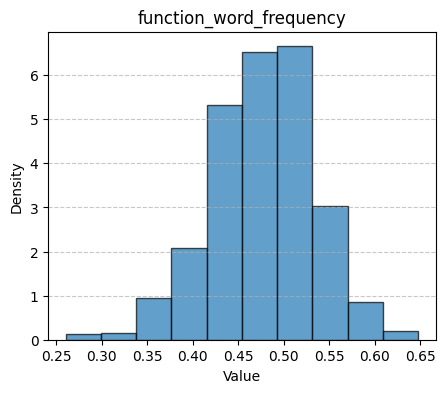

In [28]:
hist, bin_edges = np.histogram(plotting_metrics_questions[idx], density=True)

plt.figure(figsize=(5, 4))
plt.bar(bin_edges[:-1], hist, width=np.diff(bin_edges), edgecolor='black', alpha=0.7)
plt.title(metric_names_questions[idx])
plt.xlabel('Value')
plt.ylabel('Density')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()